In [163]:
# Housing Prices Kaggle competition
# Python version 3.7.7
# Latest Edit: 3/07/2023
# Testing Git commits

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from platform import python_version
from yellowbrick.regressor import AlphaSelection

print(python_version())

3.7.1


In [164]:
# Read in dataset
df = pd.read_csv('train.csv')
test_final = pd.read_csv('test.csv')

data = df.copy()
test_data = test_final.copy()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [166]:
print(data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [168]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


C:\Users\Aurian\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aurian\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aurian\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

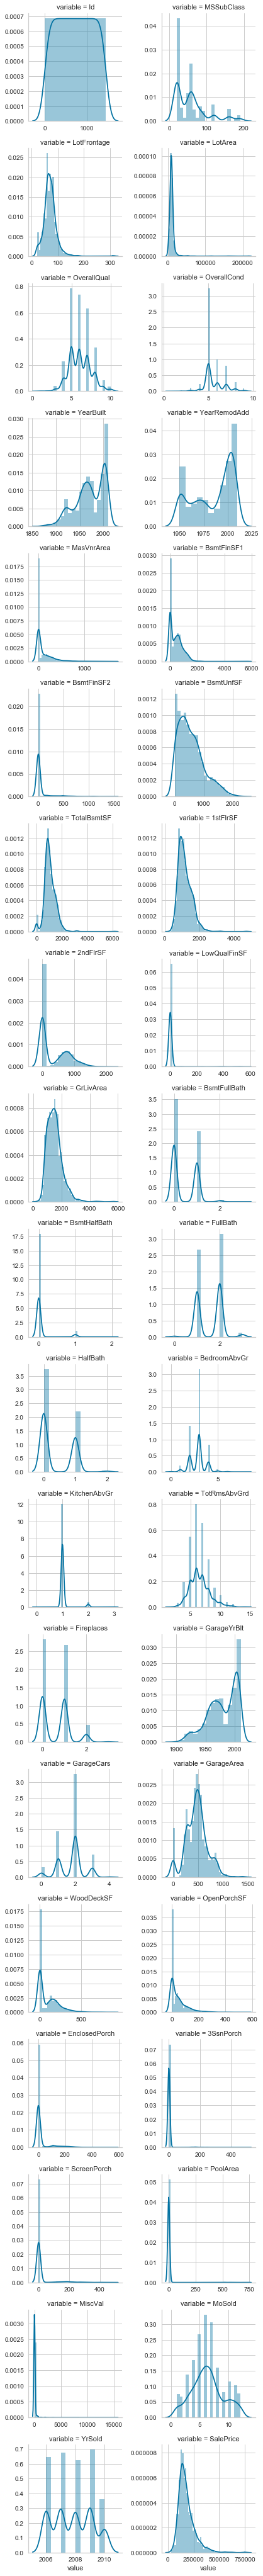

In [7]:
# Check quant distributions
quantitative = [quant for quant in data.columns if data.dtypes[quant] != 'object']
f = pd.melt(data, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [169]:
# Categorical data that doesn't describe much
# Utilities, Condition2

data['Utilities'].value_counts()
data['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [170]:
data.describe(exclude='object')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [171]:
# numerical data that doesn't describe much

# Drop Numerical and Categorical columns of no use
columns = ['Id', 'Utilities']
data.drop(columns=columns, inplace=True)
print(data.shape)

# Same for test set
columns = ['Id', 'Utilities']
test_data.drop(columns=columns, inplace=True)
print(test_data.shape)

(1460, 79)
(1459, 78)


In [172]:
X = data.drop(columns='SalePrice', axis=1)
y = data[['SalePrice']]

X.shape

(1460, 78)

### Feature Engineering

In [173]:
# Create buckets for the YearBuilt, YearRemodelAd, Garage Year Built
def year_buckets(value):
    if value < 1920:
        return 'old'
    if 1920 <= value < 1940:
        return '20-30s'
    if 1940 <= value < 1950:
        return '40s'
    if 1950 <= value < 1960:
        return '50s'
    if 1960 <= value < 1970:
        return '60s'
    if 1970 <= value < 1980:
        return '70s'
    if 1980 <= value < 1990:
        return '80s'
    if 1990 <= value < 2000:
        return '90s'
    if 2000 <= value:
        return '2000s'

In [174]:
# Create buckets for the Months
def month_buckets(value):
    if value < 4:
        return 'Q1'
    if 4 <= value < 7:
        return 'Q2'
    if 7 <= value < 10:
        return 'Q3'
    if 10 <= value:
        return 'Q4'

In [175]:
# Apply year buckets
data['YearBuilt_Bucket'] = data['YearBuilt'].apply(year_buckets)
data['YearRemodAdd_Bucket'] = data['YearRemodAdd'].apply(year_buckets)

# Apply quarter buckets
data['MoSold_Buckets'] = data['MoSold'].apply(month_buckets)

## Drop them
columns = ['YearBuilt', 'YearRemodAdd', 'MoSold']
data.drop(columns=columns, inplace=True)

# Apply year buckets
test_data['YearBuilt_Bucket'] = test_data['YearBuilt'].apply(year_buckets)
test_data['YearRemodAdd_Bucket'] = test_data['YearRemodAdd'].apply(year_buckets)

# Apply quarter buckets
test_data['MoSold_Buckets'] = test_data['MoSold'].apply(month_buckets)

## Drop them
columns = ['YearBuilt', 'YearRemodAdd', 'MoSold']
test_data.drop(columns=columns, inplace=True)

In [176]:
## Let's change the year variables into categoricals
# YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold
# GarageYrBlt imputation will be handled later
## Reasoning: Year 2000 is four time as much as year 500 doesn't make sense
data['YrSold'] = data['YrSold'].astype(str)

## Let's change the year variables into categoricals
# YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold
# GarageYrBlt imputation will be handled later
## Reasoning: Year 2000 is four time as much as year 500 doesn't make sense
test_data['YrSold'] = test_data['YrSold'].astype(str)

### Handling NA's

In [177]:
# Alley, PoolQC, MiscFeature, and Fence show high nulls.. FireplaceQu shows medium nulls
data.isna().sum()

MSSubClass                0
MSZoning                  0
LotFrontage             259
LotArea                   0
Street                    0
Alley                  1369
LotShape                  0
LandContour               0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
BldgType                  0
HouseStyle                0
OverallQual               0
OverallCond               0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType                8
MasVnrArea                8
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                 37
BsmtCond                 37
BsmtExposure             38
BsmtFinType1             37
BsmtFinSF1                0
BsmtFinType2             38
BsmtFinSF2                0
BsmtUnfSF                 0
TotalBsmtSF               0
Heating             

In [178]:
# Log lot frontage for normal distribution and then impute NA's with mean
# Use log for sale price
data['LotFrontage_log'] = np.log(data['LotFrontage'])
data['SalePrice'] = np.log(data['SalePrice'])
data.loc[data['LotFrontage_log'].isna(), 'LotFrontage_log'] = np.mean(data['LotFrontage_log'])

# Drop original non-log variable
# Drop Numerical and Categorical columns of no use
columns = ['LotFrontage']
data.drop(columns=columns, inplace=True)

# Drop Alley, PoolQC, MiscFeature, and Fence show high nulls..
columns = ['Alley', 'PoolQC', 'MiscFeature', 'Fence']
data.drop(columns=columns, inplace=True)

# Log lot frontage for normal distribution and then impute NA's with mean
test_data['LotFrontage_log'] = np.log(test_data['LotFrontage'])
test_data.loc[test_data['LotFrontage_log'].isna(), 'LotFrontage_log'] = np.mean(test_data['LotFrontage_log'])

# Drop original non-log variable
# Drop Numerical and Categorical columns of no use
columns = ['LotFrontage']
test_data.drop(columns=columns, inplace=True)

# Drop Alley, PoolQC, MiscFeature, and Fence show high nulls..
columns = ['Alley', 'PoolQC', 'MiscFeature', 'Fence']
test_data.drop(columns=columns, inplace=True)
print(data.shape)
print(test_data.shape)

(1460, 75)
(1459, 74)


In [179]:
# Now let's check alley variable
# May have to drop alley... not enough information. Will come back to this
data.loc[data['Alley'].isna()]

KeyError: 'Alley'

In [180]:
# Basement types
# It seems like when one of the values are missing, they are all missing
# Might want to drop all rows with those values and continue OR impute with a 'NAN' filler
#data.loc[(data['BsmtQual'].isna()) & (data['BsmtCond'].isna()) & (data['BsmtFinType1'].isna())
#         & (data['YearBuilt'] < 2000)]

In [181]:
# Impute all basement types with mode
# We will do another dataset where we do a list-wise deletion of observations in each of thsoe rows

data.loc[data['BsmtQual'].isna(), 'BsmtQual'] = data['BsmtQual'].mode()[0]
data.loc[data['BsmtCond'].isna(), 'BsmtCond'] = data['BsmtCond'].mode()[0]
data.loc[data['BsmtExposure'].isna(), 'BsmtExposure'] = data['BsmtExposure'].mode()[0]
data.loc[data['BsmtFinType1'].isna(), 'BsmtFinType1'] = data['BsmtFinType1'].mode()[0]
data.loc[data['BsmtFinType2'].isna(), 'BsmtFinType2'] = data['BsmtFinType2'].mode()[0]

# Impute all basement types with mode
# We will do another dataset where we do a list-wise deletion of observations in each of thsoe rows

test_data.loc[test_data['BsmtQual'].isna(), 'BsmtQual'] = test_data['BsmtQual'].mode()[0]
test_data.loc[test_data['BsmtCond'].isna(), 'BsmtCond'] = test_data['BsmtCond'].mode()[0]
test_data.loc[test_data['BsmtExposure'].isna(), 'BsmtExposure'] = test_data['BsmtExposure'].mode()[0]
test_data.loc[test_data['BsmtFinType1'].isna(), 'BsmtFinType1'] = test_data['BsmtFinType1'].mode()[0]
test_data.loc[test_data['BsmtFinType2'].isna(), 'BsmtFinType2'] = test_data['BsmtFinType2'].mode()[0]

In [182]:
# Impute mode for MasVnr and replace 0 for MasArea for mode
# Will run another dataset with list-wise deletion
data.loc[data['MasVnrType'].isna(), 'MasVnrType'] = data['MasVnrType'].mode()[0]
data.loc[data['MasVnrArea'].isna(), 'MasVnrArea'] = data['MasVnrArea'].mode()[0]

# Impute mode for MasVnr and replace 0 for MasArea for mode
# Will run another dataset with list-wise deletion
test_data.loc[test_data['MasVnrType'].isna(), 'MasVnrType'] = test_data['MasVnrType'].mode()[0]
test_data.loc[test_data['MasVnrArea'].isna(), 'MasVnrArea'] = test_data['MasVnrArea'].mode()[0]

In [183]:
data.isna().sum()

MSSubClass               0
MSZoning                 0
LotArea                  0
Street                   0
LotShape                 0
LandContour              0
LotConfig                0
LandSlope                0
Neighborhood             0
Condition1               0
Condition2               0
BldgType                 0
HouseStyle               0
OverallQual              0
OverallCond              0
RoofStyle                0
RoofMatl                 0
Exterior1st              0
Exterior2nd              0
MasVnrType               0
MasVnrArea               0
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
Heating                  0
HeatingQC                0
CentralAir               0
Electrical               1
1

In [184]:
# Replace Electrical with mode
data.loc[data.Electrical.isna(), 'Electrical'] = data.Electrical.mode()[0]

# Replace Electrical with mode
test_data.loc[test_data.Electrical.isna(), 'Electrical'] = test_data.Electrical.mode()[0]

In [185]:
# There was a nomenclature error where when fireplaces = 0, it would show NA for Fireplace Quality
# We will feature engineer a new category within fireplace quality to account for 'None' instead of NA
data.loc[data['FireplaceQu'].isna(), 'FireplaceQu'] = 'None'
print(data['FireplaceQu'].value_counts())

# There was a nomenclature error where when fireplaces = 0, it would show NA for Fireplace Quality
# We will feature engineer a new category within fireplace quality to account for 'None' instead of NA
test_data.loc[test_data['FireplaceQu'].isna(), 'FireplaceQu'] = 'None'
print(test_data['FireplaceQu'].value_counts())

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64
None    730
Gd      364
TA      279
Fa       41
Po       26
Ex       19
Name: FireplaceQu, dtype: int64


In [186]:
# Garage variables
data.isna().sum()

MSSubClass              0
MSZoning                0
LotArea                 0
Street                  0
LotShape                0
LandContour             0
LotConfig               0
LandSlope               0
Neighborhood            0
Condition1              0
Condition2              0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
RoofStyle               0
RoofMatl                0
Exterior1st             0
Exterior2nd             0
MasVnrType              0
MasVnrArea              0
ExterQual               0
ExterCond               0
Foundation              0
BsmtQual                0
BsmtCond                0
BsmtExposure            0
BsmtFinType1            0
BsmtFinSF1              0
BsmtFinType2            0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
Heating                 0
HeatingQC               0
CentralAir              0
Electrical              0
1stFlrSF                0
2ndFlrSF    

In [187]:
# Feature engineer garage types to include 'None' type for 0 garages
# Change year variables to categorical
data.loc[(data['GarageType'].isna()) & (data['GarageYrBlt'].isna()) & (data['GarageFinish'].isna())
        &(data['GarageQual'].isna()) & (data['GarageCond'].isna())]

# Replace the no garages with none type for categorical and 0 for numerical
data.loc[data['GarageType'].isna(), 'GarageType'] = 'None'
data.loc[data['GarageFinish'].isna(), 'GarageFinish'] = 'None'
data.loc[data['GarageQual'].isna(), 'GarageQual'] = 'None'
data.loc[data['GarageCond'].isna(), 'GarageCond'] = 'None'

# Apply year buckets to GarageYrBlt
data['GarageYrBlt_Buckets'] = data['GarageYrBlt'].apply(year_buckets)

# Drop it
data.drop(columns= ['GarageYrBlt'], inplace=True)

# Fill NA after creating buckets
data.loc[data['GarageYrBlt_Buckets'].isna(), 'GarageYrBlt_Buckets'] = 'None'

# Feature engineer garage types to include 'None' type for 0 garages
# Change year variables to categorical
test_data.loc[(test_data['GarageType'].isna()) & (test_data['GarageYrBlt'].isna()) & (test_data['GarageFinish'].isna())
        &(test_data['GarageQual'].isna()) & (test_data['GarageCond'].isna())]

# Replace the no garages with none type for categorical and 0 for numerical
test_data.loc[test_data['GarageType'].isna(), 'GarageType'] = 'None'
test_data.loc[test_data['GarageFinish'].isna(), 'GarageFinish'] = 'None'
test_data.loc[test_data['GarageQual'].isna(), 'GarageQual'] = 'None'
test_data.loc[test_data['GarageCond'].isna(), 'GarageCond'] = 'None'

# Apply year buckets to GarageYrBlt
test_data['GarageYrBlt_Buckets'] = test_data['GarageYrBlt'].apply(year_buckets)

# Drop it
test_data.drop(columns= ['GarageYrBlt'], inplace=True)

# Fill NA after creating buckets
test_data.loc[test_data['GarageYrBlt_Buckets'].isna(), 'GarageYrBlt_Buckets'] = 'None'

In [188]:
# Check the Pool QC spots
data.loc[data['PoolQC'].isna(), ['PoolQC']] = 'None'

# Check the Pool QC spots
test_data.loc[test_data['PoolQC'].isna(), ['PoolQC']] = 'None'

KeyError: 'PoolQC'

In [189]:
# Check Fence NA values
# Impute NA values with None
data.loc[data['Fence'].isna(), 'Fence'] = 'None'

# Check Fence NA values
# Impute NA values with None
test_data.loc[test_data['Fence'].isna(), 'Fence'] = 'None'

KeyError: 'Fence'

In [190]:
# Check MiscFeature NA values
data.loc[data['MiscFeature'].isna(), 'MiscFeature'] = 'None'

# Check MiscFeature NA values
test_data.loc[test_data['MiscFeature'].isna(), 'MiscFeature'] = 'None'

KeyError: 'MiscFeature'

In [191]:
# Check Alley Na values and fill with None
data.loc[data['Alley'].isna(), 'Alley'] = 'None'

# Check Alley Na values and fill with None
test_data.loc[test_data['Alley'].isna(), 'Alley'] = 'None'

KeyError: 'Alley'

In [192]:
# Get Dummy Variables 
cat_cols = data.describe(exclude='number').columns.tolist()

dummy_vars = pd.get_dummies(data[cat_cols])
new_data = pd.concat([data, dummy_vars], axis=1)
new_data.drop(columns=cat_cols, inplace=True, axis=1)

print(new_data.shape)

# Get Dummy Variables 
cat_cols_test = test_data.describe(exclude='number').columns.tolist()

dummy_vars_test = pd.get_dummies(test_data[cat_cols_test])
new_data_test = pd.concat([test_data, dummy_vars_test], axis=1)
new_data_test.drop(columns=cat_cols_test, inplace=True, axis=1)

print(new_data_test.shape)

(1460, 308)
(1459, 292)


In [193]:
# Get Dummy Variables 
#feats_to_encode = data.describe(exclude='number').columns.tolist()
feats_to_scale = data.describe(exclude='object').columns.tolist()
feats_to_scale

# Get Dummy Variables 
#feats_to_encode = data.describe(exclude='number').columns.tolist()
feats_to_scale_test = test_data.describe(exclude='object').columns.tolist()
feats_to_scale_test

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'LotFrontage_log']

In [194]:
feats_to_scale.remove('SalePrice')
feats_to_scale

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'LotFrontage_log']

In [195]:
## Fit final model with scaled features now
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaled_columns = scaler.fit_transform(data[feats_to_scale])
scaled_df = pd.DataFrame(scaled_columns)
scaled_df.columns = feats_to_scale

# Drop feats
new_data.drop(columns=feats_to_scale, inplace=True, axis=1)
final_data = pd.concat([scaled_df, new_data], axis=1)
final_data = pd.DataFrame(final_data)
print(final_data.shape)

## Fit final model with scaled features now
scaler_test = MinMaxScaler()
scaled_columns_test = scaler_test.fit_transform(new_data_test[feats_to_scale_test])
scaled_df_test = pd.DataFrame(scaled_columns_test)
scaled_df_test.columns = feats_to_scale_test

# Drop feats
new_data_test.drop(columns=feats_to_scale_test, inplace=True, axis=1)
final_data_test = pd.concat([scaled_df_test, new_data_test], axis=1)
final_data_test = pd.DataFrame(final_data_test)
print(final_data_test.shape)

(1460, 308)
(1459, 292)


In [196]:
X = final_data.drop(columns='SalePrice', axis=1)
y = final_data[['SalePrice']]

# LR Method THEN L1, L2 method THEN we will go into Random Forest Method

KFold is a cross-validator that divides the dataset into k folds.  
Stratified is to ensure that each fold of dataset has the same proportion of observations with a given label.  
We should prefer StratifiedKFold over KFold when dealing with classifications tasks with imbalanced class distributions.

C:\Users\Aurian\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Aurian\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.136133093706064, tolerance: 0.01891283972369289
  tol, rng, random, positive)
C:\Users\Aurian\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Aurian\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.289668584438914, tolerance: 0.018002422128285202
  tol, rng, rando

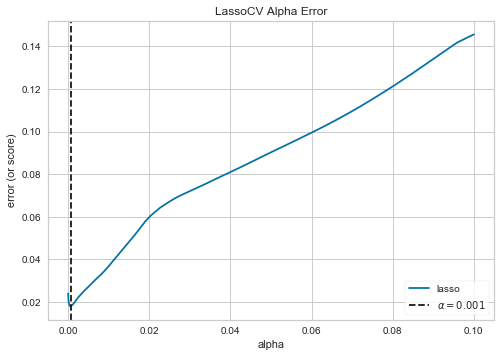

In [197]:
alphas = np.linspace(0,0.1,1001)
clf = LassoCV(alphas=alphas)
visualizer = AlphaSelection(clf)
visualizer.fit(X,y.values.ravel())
visualizer.show()

In [198]:
l1_model = Lasso(alpha=0.001)
l1_model.fit(X,y)

l1_model_df = pd.DataFrame(l1_model.coef_, X.columns, columns=['l1_coef'])
l1_model_df.reset_index(inplace = True)
l1_model_df.rename(columns = {'index': 'features'}, inplace = True)
l1_model_df.l1_coef = l1_model_df.l1_coef.round(4)

l1_final = l1_model_df.loc[l1_model_df['l1_coef'] != 0]
l1_feats = l1_final.features.tolist()

l1_final.sort_values(['l1_coef'], ascending=False).reset_index()

,index,features,l1_coef
0,12,GrLivArea,0.8791
1,2,OverallQual,0.5547
2,21,GarageCars,0.2463
3,3,OverallCond,0.2213
4,19,TotRmsAbvGrd,0.1523
5,15,FullBath,0.1180
6,13,BsmtFullBath,0.1085
7,60,Neighborhood_Crawfor,0.0948
8,70,Neighborhood_NridgHt,0.0768
9,76,Neighborhood_StoneBr,0.0766


In [199]:
X.shape
X2 = X[l1_feats]
X2.shape

(1460, 92)

In [200]:
l1_model = Lasso(alpha=0.001)
l1_model.fit(X2,y)

l1_model_df = pd.DataFrame(l1_model.coef_, X2.columns, columns=['l1_coef'])
l1_model_df.reset_index(inplace = True)
l1_model_df.rename(columns = {'index': 'features'}, inplace = True)
l1_model_df.l1_coef = l1_model_df.l1_coef.round(4)

l1_final = l1_model_df.loc[l1_model_df['l1_coef'] != 0]
l1_feats = l1_final.features.tolist()

l1_final.sort_values(['l1_coef'], ascending=False).reset_index(drop=True)

,features,l1_coef
0,GrLivArea,0.8790
1,OverallQual,0.5545
2,GarageCars,0.2462
3,OverallCond,0.2214
4,TotRmsAbvGrd,0.1524
5,FullBath,0.1179
6,BsmtFullBath,0.1085
7,Neighborhood_Crawfor,0.0948
8,Neighborhood_NridgHt,0.0768
9,Neighborhood_StoneBr,0.0766


In [201]:
final_data_test_lasso = final_data_test[l1_feats]

In [202]:
final_data_test_lasso = final_data_test_lasso.fillna(final_data_test_lasso.median())

In [203]:
preds = l1_model.predict(final_data_test_lasso)

In [204]:
preds = np.exp(preds)
preds

array([111665.88770174, 141137.78714211, 162285.19179496, ...,
       147276.29860136, 114676.6287219 , 227277.61084625])

In [205]:
sub = pd.DataFrame()    #create an empty dataframe
sub['Id'] = test_final['Id']   #create a column with the test Id's
sub['SalePrice'] = preds  #create a column with the test predictions
sub.to_csv('submission.csv',index=False) #submission file
sub.head()

,Id,SalePrice
0,1461,111665.887702
1,1462,141137.787142
2,1463,162285.191795
3,1464,186925.475765
4,1465,188835.516836


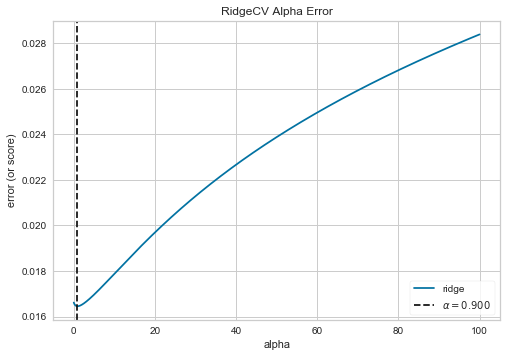

In [206]:
alphas = np.linspace(0.0001,100,1001)
clf = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(clf)
visualizer.fit(X2,y.values.ravel())
visualizer.show()

In [207]:
# L2 model
l2_model = Ridge(alpha=0.900)
l2_model.fit(X2,y)

l2_model_df = pd.DataFrame(l2_model.coef_[0], X2.columns, columns=['l2_coef'])
l2_model_df.reset_index(inplace = True)
l2_model_df.rename(columns = {'index': 'features'}, inplace = True)
l2_model_df.l2_coef = l2_model_df.l2_coef.round(4)

l2_model_df.sort_values(['l2_coef'], ascending=False).reset_index(drop=True)

,features,l2_coef
0,GrLivArea,0.7307
1,OverallQual,0.4800
2,OverallCond,0.2809
3,TotRmsAbvGrd,0.2269
4,GarageCars,0.1989
5,FullBath,0.1655
6,Neighborhood_StoneBr,0.1609
7,BsmtFullBath,0.1468
8,Neighborhood_Crawfor,0.1366
9,ScreenPorch,0.1259


In [208]:
# L2 model preds with l1
preds = l2_model.predict(final_data_test_lasso)
preds = np.exp(preds)

In [209]:
sub = pd.DataFrame()    #create an empty dataframe
sub['Id'] = test_final['Id']   #create a column with the test Id's
sub['SalePrice'] = preds  #create a column with the test predictions
sub.to_csv('submission.csv',index=False) #submission file
sub.head()

,Id,SalePrice
0,1461,113852.371857
1,1462,143282.066220
2,1463,157185.229412
3,1464,182392.923768
4,1465,192515.855996


In [210]:
X = final_data.drop(columns='SalePrice', axis=1)
y = final_data[['SalePrice']]

In [219]:
X = X[final_data_test.columns.tolist()]

In [220]:
# Gradient boost
boost = GradientBoostingRegressor()
boost.fit(X,y.values.ravel())

GradientBoostingRegressor()

In [221]:
cv = KFold(n_splits=5, shuffle=True)
cross_val_score(boost, X, y.values.ravel(), cv=cv, scoring='neg_root_mean_squared_error')

array([-0.12870794, -0.1148792 , -0.12919472, -0.17468455, -0.12407674])

In [226]:
preds = boost.predict(final_data_test)
preds = np.exp(preds)

In [224]:
final_data_test.dropna(inplace=True)

In [229]:
sub = pd.DataFrame()    #create an empty dataframe
sub['Id'] = test_final['Id']   #create a column with the test Id's
sub['SalePrice'] = preds  #create a column with the test predictions
sub.to_csv('submission.csv',index=False) #submission file
sub.head()

ValueError: Length of values (1456) does not match length of index (1459)

In [158]:
test_final.shape

(1459, 80)

In [ ]:
from sklearn.model_selection import train_test_split

# L1 Features
X_l1 = X[l1_feats]
X_train, X_test, y_train, y_test = train_test_split(X_l1, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# X_Train Splits and calcualte rmse
# This is essentially redundant since I already did a K-fold cross val during my model fitting phase
X_train, X_test, y_train, y_test = train_test_split(X_l1, y, test_size = 0.2)
lasso = Lasso(alpha=0.0035)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])

residuals = y_test.values - y_pred.values
rmse = round(np.sqrt(np.mean(residuals**2)),2)
print(rmse)

In [570]:
new_data_test = final_data_test[l1_feats]
new_data_test.shape

(1459, 33)

In [119]:
scaler_test = MinMaxScaler()
scaled_output = scaler_test.fit_transform(np.array(df['SalePrice']).reshape(-1,1))

In [ ]:
scaleme = MinMaxScaler()
lilly = scaleme.fit_transform()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage_log,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,Mis

In [118]:
scaler_test.inverse_transform(scaled_output)

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [579]:
sub = pd.DataFrame()    #create an empty dataframe
sub['Id'] = test_final['Id']   #create a column with the test Id's
sub['SalePrice'] = preds  #create a column with the test predictions
sub.to_csv('submission.csv',index=False) #submission file
sub.head()

,Id,SalePrice
0,1461,113539.092852
1,1462,133717.263282
2,1463,163939.688044
3,1464,191692.748494
4,1465,189358.083024


# RANDOM FOREST

In [636]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# X w. test
cols = final_data_test.columns.tolist()
X_test = X[cols]
rf = RandomForestRegressor()
cross_val_score(rf, X_test, y.values.ravel(), cv=cv)

array([0.89300371, 0.86967369, 0.85496645, 0.8694819 , 0.839232  ])

In [637]:
estimators = [50,100,150,200,250]

for i in estimators:
    rf = RandomForestRegressor(n_estimators=i)
    print(i, cross_val_score(rf, X_test, y.values.ravel(), cv=cv, scoring='neg_root_mean_squared_error'))
    print('---------------------------------------------------------')

50 [-0.13759921 -0.15498739 -0.16058934 -0.12958474 -0.15590241]
---------------------------------------------------------
100 [-0.13115379 -0.13518463 -0.14788779 -0.17297943 -0.1319031 ]
---------------------------------------------------------
150 [-0.15777444 -0.14086137 -0.14914519 -0.12625626 -0.14609072]
---------------------------------------------------------
200 [-0.12678695 -0.16024296 -0.1434236  -0.13965862 -0.14608094]
---------------------------------------------------------
250 [-0.16854449 -0.14813076 -0.13114537 -0.12510917 -0.14412617]
---------------------------------------------------------


In [645]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 40)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20, 25, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10, 15, 20, 30, 40, 50]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 15, 20, 30, 40, 50], 'bootstrap': [True, False]}


In [646]:
from sklearn.model_selection import StratifiedKFold
# Use the random grid to search for best hyperparameters
cv = KFold(n_splits=5, shuffle=True)
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = cv, verbose=2, random_state=42, n_jobs = -1, scoring='neg_root_mean_squared_error')
# Fit the random search model
rf_random.fit(X_test, y.values.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.9min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             15, 20, 30, 40,
                                                             50],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25, 30],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                     

In [647]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [648]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      n_estimators=1600)

In [651]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor()
base_model.fit(X_test, y.values.ravel())
base_accuracy = evaluate(base_model, test_features=X_test, test_labels=y.values.ravel())

Model Performance
Average Error: 0.0361 degrees.
Accuracy = 99.70%.


In [652]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features=X_test, test_labels=y.values.ravel())

Model Performance
Average Error: 0.0001 degrees.
Accuracy = 100.00%.


In [657]:
# Fit with RF
rf = RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      n_estimators=1600)

rf.fit(X_test,y.values.ravel())

#Fill NA's before predict
final_data_test = final_data_test.fillna(final_data_test.median())
test_preds = rf.predict(final_data_test)

In [659]:
preds = np.exp(test_preds)

In [660]:
sub = pd.DataFrame()    #create an empty dataframe
sub['Id'] = test_final['Id']   #create a column with the test Id's
sub['SalePrice'] = preds  #create a column with the test predictions
sub.to_csv('submission.csv',index=False) #submission file
sub.head()

,Id,SalePrice
0,1461,128359.671580
1,1462,152698.553301
2,1463,179198.804997
3,1464,189566.364282
4,1465,188710.448134


In [632]:
X.shape

(1460, 324)

In [633]:
final_data_test.shape

(1459, 307)

In [661]:
from sklearn.feature_selection import RFECV

In [664]:
rfe = RFECV(rf,cv=cv,scoring="neg_root_mean_squared_error")

rfe.fit(X_test,y.values.ravel())

RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
      estimator=RandomForestRegressor(bootstrap=False, max_depth=80,
                                      max_features='sqrt', n_estimators=1600),
      scoring='neg_root_mean_squared_error')

In [687]:
selected_features = np.array(X_test.columns)[rfe.get_support()]

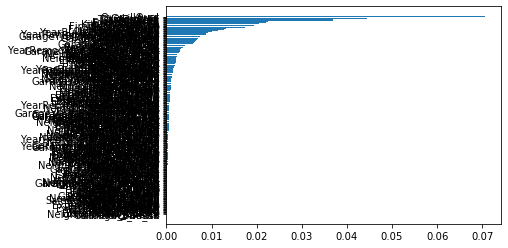

In [682]:
f_i = list(zip(X_test.columns,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [689]:
# Fit RF with new features
# X w. test
cols = final_data_test.columns.tolist()
X_test2 = X[selected_features]
rf = RandomForestRegressor()
cross_val_score(rf, X_test2, y.values.ravel(), cv=cv)

array([0.86314562, 0.83668487, 0.86170617, 0.90784909, 0.8884982 ])

In [708]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 8)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
gs_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(gs_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'bootstrap': [True, False]}


In [709]:
# Use the random grid to search for best hyperparameters
cv = KFold(n_splits=5, shuffle=True)
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_gs = GridSearchCV(estimator = rf, param_grid = gs_grid, cv = cv, verbose=2, n_jobs = -1, scoring='neg_root_mean_squared_error')
# Fit the random search model
rf_gs.fit(X_test2, y.values.ravel())

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2544 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3233 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 4853 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 5784 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 6797 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 7890 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 9065 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 10320 tasks      

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [711]:
rf_gs.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [712]:
rf_gs.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      n_estimators=300)

In [714]:
# Fit with RF
rf = RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      n_estimators=300)

rf.fit(X_test2,y.values.ravel())

#Fill NA's before predict
final_data_test = final_data_test[X_test2.columns.tolist()]
final_data_test = final_data_test.fillna(final_data_test.median())
test_preds = rf.predict(final_data_test)

In [716]:
preds = np.exp(test_preds)

In [718]:
sub = pd.DataFrame()    #create an empty dataframe
sub['Id'] = test_final['Id']   #create a column with the test Id's
sub['SalePrice'] = preds  #create a column with the test predictions
sub.to_csv('submission.csv',index=False) #submission file
sub.head()

,Id,SalePrice
0,1461,128313.910569
1,1462,154477.343937
2,1463,175304.601839
3,1464,182953.698230
4,1465,191045.454239
